# **Step #1: Data preparation**

- Import Libraries
- Load Data
- Drop the duplicated values 
- Fill the null values with the mean of the column
- Convert the type of the column to int64


# 1. Import libraries

In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# 2 Load Data. The Google Movie Dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"

### 2.1 Load Data

In [5]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

#### 2.2 Drop duplicates and check the number of null values in Runtime
#### Fill the null values in Runtime with the mean of Runtime

In [12]:
# 2.1 Drop duplicates
movie_df.drop_duplicates(inplace=True)

# 2.2 Check the number of null values in Runtime
print('The Data Cleaning is done.', end=' ')
print('The number of null values in Runtime is', movie_df['Runtime'].isnull().sum())

# 3. Fill the null values in Runtime with the mean of Runtime
mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)


The Data Cleaning is done. 

KeyError: 'Runtime'

#### 2.3 Convert the type of Runtime to int64 

In [11]:

# 3.1 Check the descriptive statistics of Runtime
print(movie_df['Runtime'].describe())
# movie_df.describe()
# len(movie_df)
movie_df.info()

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head(20)

KeyError: 'Runtime'

In [14]:
movie_df.info()
movie_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Runtime (min)  1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Overview       1000 non-null   object 
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          1000 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 109.4+ KB


,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only the numerical variables (other than `Runtime (min)`) for the features and `Runtime (min)` for the label.


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
movie_df['Genre'] = le.fit_transform(movie_df['Genre'])

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,6,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,5,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,0,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,5,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,5,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [28]:
features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Genre']]
label = movie_df['Runtime (min)']

# **Step #3: Split data into training and testing data**

Split the data using a 80 / 20 split.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# **Step #4: Import the model and initialize with default parameters**

Linear model does not have hyperparameters.


In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()


# **Step #5: Fit your model with training data, Test your model with testing data**

Linear model does not have hyperparameters.


In [35]:

LR.fit(X_train, y_train)
pred= LR.predict(X_test)

# **Step #6: Data Visualization**

Linear model does not have hyperparameters.


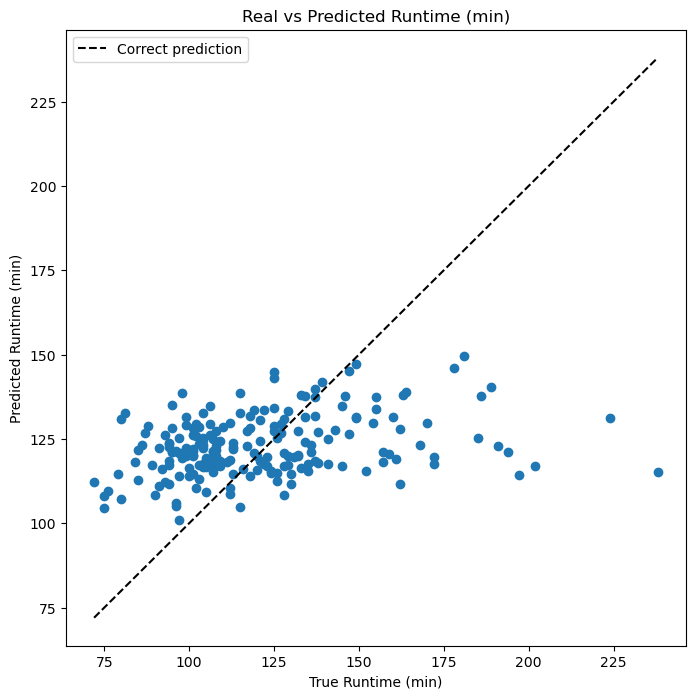

In [36]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True Runtime (min)')
plt.ylabel('Predicted Runtime (min)')
plt.title("Real vs Predicted Runtime (min)")

plt.legend()

# **Step #7: Evaluate your model with testing data**

Linear model does not have hyperparameters.
```
print(f"R-squared: {r2_score(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
```


In [37]:
print(f"R-squared: {r2_score(y_test, pred)}")
RMSE = np.sqrt(mean_squared_error(y_test, pred))
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")

R-squared: 0.09548615660454252
MAE: 20.98601253254496
MSE: 741.7906949391565


---
---
---

In [21]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [16]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

In [17]:
# 2.1 Drop duplicates
movie_df.drop_duplicates(inplace=True)

# 2.2 Check the number of null values in Runtime
print('The Data Cleaning is done.', end=' ')
print('The number of null values in Runtime is', movie_df['Runtime'].isnull().sum())

# 3. Fill the null values in Runtime with the mean of Runtime
mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)


movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})


The Data Cleaning is done. The number of null values in Runtime is 7


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
movie_df['Genre'] = le.fit_transform(movie_df['Genre'])

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,6,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,5,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,0,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,5,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,5,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [19]:
features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross', 'Genre']]
label = movie_df['Runtime (min)']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)
pred= LR.predict(X_test)


In [23]:
print(f"R-squared: {r2_score(y_test, pred)}")
RMSE = np.sqrt(mean_squared_error(y_test, pred))
print(f"RMSE: {RMSE}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")

R-squared: 0.09548615660454252
RMSE: 27.235834757524074
MAE: 20.98601253254496
MSE: 741.7906949391565
